In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
import os, h5py
import tensorflow as tf

from msfm.utils.input_output import read_yaml

In [2]:
conf_dir = "../../configs/config.yaml"
conf = read_yaml(conf_dir)

n_side = conf["analysis"]["n_side"]
n_pix = conf["analysis"]["n_pix"]

In [3]:
pix_file = "../../data/DESY3_pixels_512.h5"
with h5py.File(pix_file, "r") as f:
    data_vec_pix = f["metacal/map_cut_outs/data_vec_ids"][:]
    non_tomo_patches_pix = f["metacal/masks/RING/non_tomo"][:]

# weak lensing

In [4]:
# data_vector_dir = "/cluster/scratch/athomsen/CosmoGrid/DESY3/v1/cosmo_delta_H0_m"
data_vector_dir = "/Users/arne/data/CosmoGrid_example/DES/grid/cosmo_000001"
data_vector_file = "data_vectors.h5"

with h5py.File(os.path.join(data_vector_dir, data_vector_file), "r") as f:
    print(f.keys())
    kg = f["kg"][:]
    ia = f["ia"][:]
    sn = f["sn"][:]

maps = np.stack([kg, ia, sn])
print(maps.shape)

n_types = maps.shape[0]
n_patches = maps.shape[1]
n_dv = maps.shape[2]
n_tomos = maps.shape[3]

<KeysViewHDF5 ['ia', 'kg', 'sn']>
(3, 16, 463872, 4)


In [5]:
map_types = ["kg", "ia", "sn"]
long_map_types = ["lensing signal", "intrinsic alignment", "shape noise"]
tomos = np.arange(4)

## gnomview

In [6]:
square_pix = 500
reso = 1

gnoms = np.zeros((n_types, n_patches, square_pix, square_pix, n_tomos))
for i in range(n_types):
    for j in range(n_patches):
        for k in range(n_tomos):
            hp_map = np.zeros(n_pix)
            hp_map[data_vec_pix] = maps[i,j,:,k]

            gnoms[i,j,:,:,k] = hp.gnomview(hp_map, nest=True, rot=(90, -30, 0), reso=reso, return_projected_map=True, no_plot=True, xsize=square_pix, ysize=square_pix)

### tomo

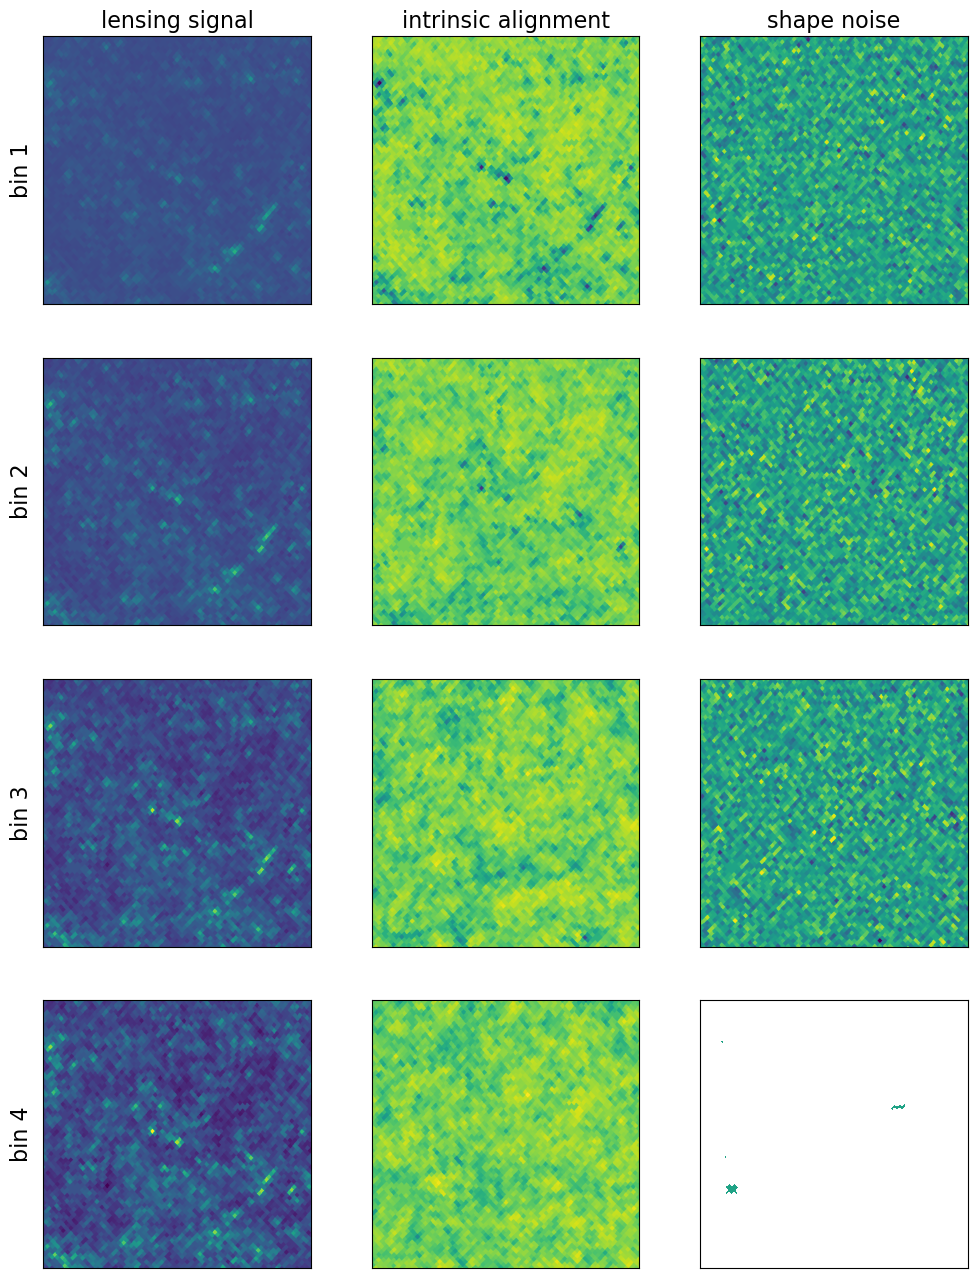

In [7]:
# fix the patch
patch_id = 0

fig, ax = plt.subplots(figsize=(4*n_types, 4*n_tomos), nrows=n_tomos, ncols=n_types, sharex=True, sharey=True)

for i in range(n_tomos):        
    for j, map_type in enumerate(long_map_types):
        # over all axis but the map type and fixed patch
        vmin = np.nanmin(gnoms[j,patch_id])
        vmax = np.nanmax(gnoms[j,patch_id])

        gnom = gnoms[j,patch_id,:,:,i]

        im = ax[i,j].imshow(gnom, vmin=vmin, vmax=vmax)

        # cosmetics
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        if i==0:
            ax[i,j].set_title(label=long_map_types[j], fontsize=16)

        if j==0:
            ax[i,j].set_ylabel(ylabel=f"bin {i+1}", fontsize=16)

        if i==(n_patches-1):
            fig.colorbar(im, ax=ax[:,j], orientation="horizontal", shrink=0.8, aspect=8, pad=0.03)

In [8]:
# # fix the patch
# patch_id = 0

# fig, ax = plt.subplots(figsize=(4*n_tomos+4, 4*n_types), nrows=n_types, ncols=n_tomos, sharex=True, sharey=True)

# for i, map_type in enumerate(long_map_types):
#     # over all axis but the map type and fixed patch
#     vmin = np.nanmin(gnoms[i,patch_id])
#     vmax = np.nanmax(gnoms[i,patch_id])

#     for j in range(n_tomos):
#         gnom = gnoms[i,patch_id,:,:,j]

#         im = ax[i,j].imshow(gnom, vmin=vmin, vmax=vmax)

#         # cosmetics
#         ax[i,j].set_xticks([])
#         ax[i,j].set_yticks([])

#         if i==0:
#             ax[i,j].set_title(label=f"bin {j+1}", fontsize=16)

#         if j==0:
#             ax[i,j].set_ylabel(ylabel=long_map_types[i], fontsize=16)

#         if j==(n_tomos-1):
#             fig.colorbar(im, ax=ax[i,:], orientation="vertical", shrink=0.8, aspect=8, pad=0.03)

### patches

In [9]:
# fix the tomographic bin
tomo = 3

fig, ax = plt.subplots(figsize=(4*n_types, 4*n_patches), nrows=n_patches, ncols=n_types, sharex=True, sharey=True)

for i in range(n_patches):
    for j, map_type in enumerate(long_map_types):
        # over all axis but the map type and fixed tomographic bin
        vmin = np.nanmin(gnoms[j,:,:,:,tomo])
        vmax = np.nanmax(gnoms[j,:,:,:,tomo])

        gnom = gnoms[j,i,:,:,tomo]

        im = ax[i,j].imshow(gnom, vmin=vmin, vmax=vmax)

        # cosmetics
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

        if i==0:
            ax[i,j].set_title(label=long_map_types[j], fontsize=16)

        if j==0:
            ax[i,j].set_ylabel(ylabel=f"patch {i+1}", fontsize=16)

        if i==(n_patches-1):
            fig.colorbar(im, ax=ax[:,j], orientation="horizontal", shrink=0.8, aspect=8, pad=0.03)

## mollview

### tomo

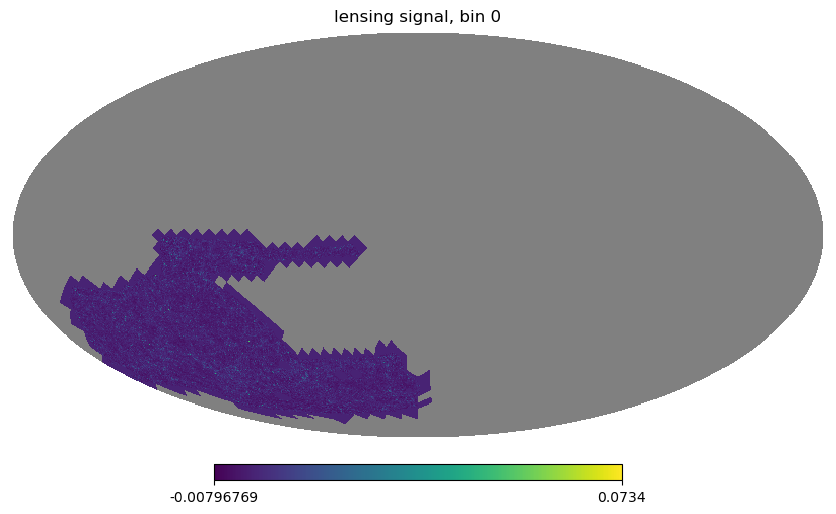

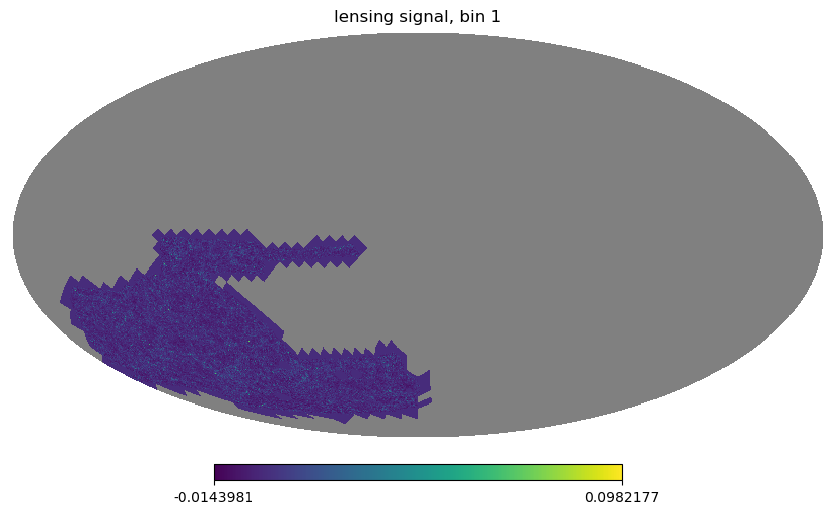

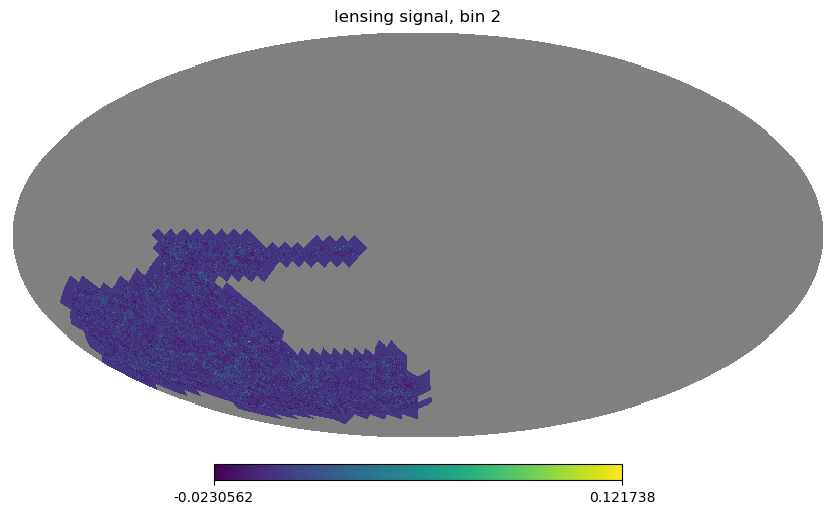

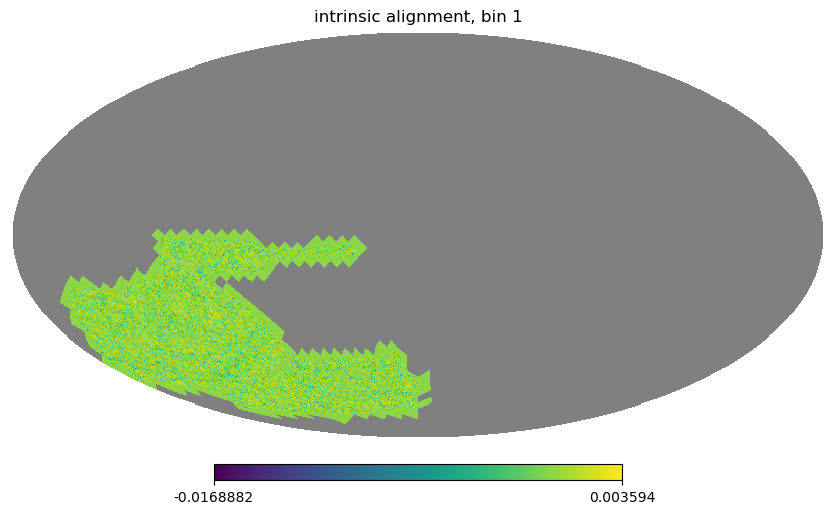

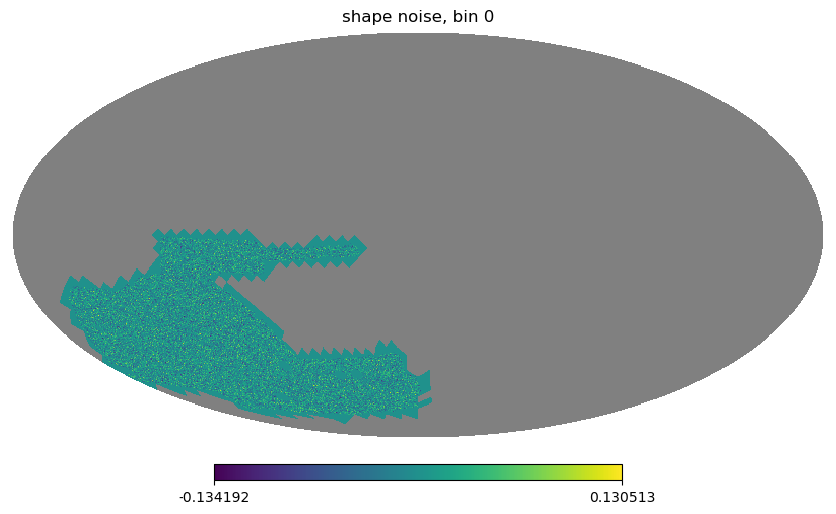

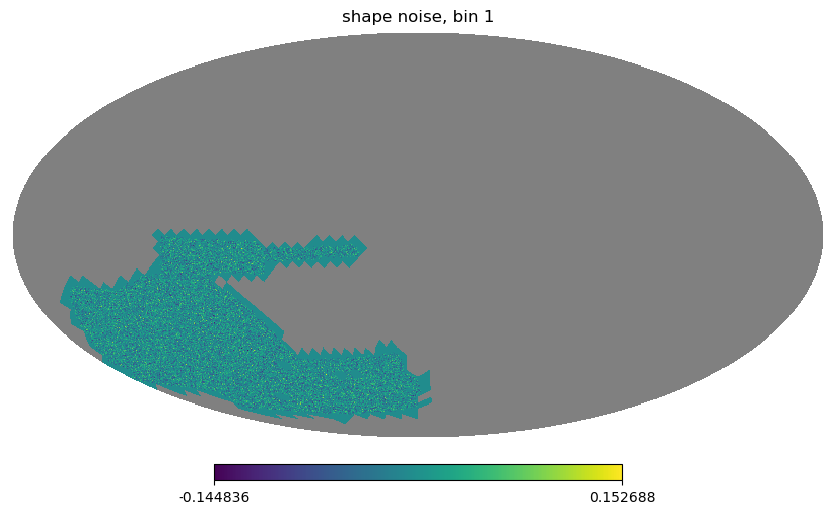

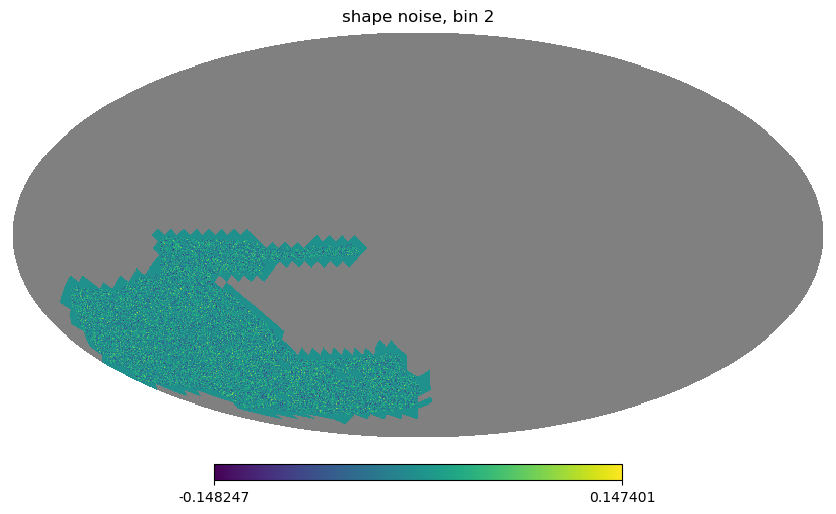

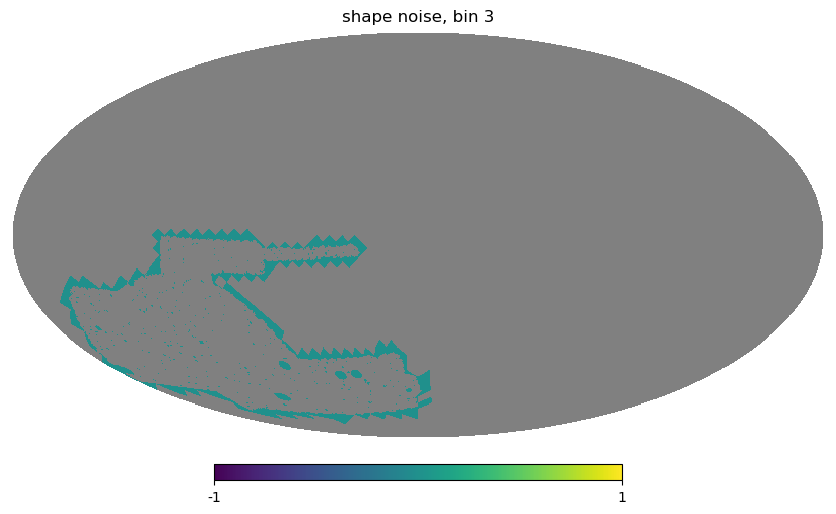

In [10]:
# fix the patch
patch_id = 0

for i, map_type in enumerate(long_map_types):
    for j in range(n_tomos):
        vmin = np.nanmin(maps[i,patch_id,:,j])
        vmax = np.nanmax(maps[i,patch_id,:,j])

        hp_map = np.full(n_pix, hp.UNSEEN)
        hp_map[data_vec_pix] = maps[i,patch_id,:,j]

        hp.mollview(hp_map, title=f"{map_type}, bin {j}", nest=True, min=vmin, max=vmax)